## 021 データを読み込む

In [131]:
import pandas as pd
import seaborn as sns
import numpy as np

In [132]:
uselog = pd.read_csv('./input/100knoks/03/use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [133]:
customer_master = pd.read_csv('./input/100knoks/03/customer_master.csv')
print(len(customer_master))
customer_master.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [134]:
class_master = pd.read_csv('./input/100knoks/03/class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [135]:
campaign_master = pd.read_csv('./input/100knoks/03/campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


## 022 顧客データの整形

In [136]:
customer = pd.merge(customer_master, class_master, on='class', how='left')
customer = pd.merge(customer, campaign_master, on='campaign_id', how='left')
customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,オールタイム,10500,通常


In [137]:
customer.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

## 023 顧客データの基礎集計

In [138]:
customer.groupby('class_name').count()['customer_id']

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [139]:
customer.groupby('campaign_name').count()['customer_id']

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [140]:
customer.groupby('gender').count()['customer_id']

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [141]:
customer.groupby('is_deleted').count()['customer_id']

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [142]:
customer['start_date'] = pd.to_datetime(customer['start_date'])
customer_start = customer.loc[customer['start_date'] > pd.to_datetime('2018-4-1')]
print(customer_start)
print(len(customer_start))

     customer_id   name class gender start_date             end_date  \
2831    HI195873    XXX   C01      F 2018-04-02  2018-08-31 00:00:00   
2832    TS322485     XX   C03      F 2018-04-02  2018-08-31 00:00:00   
2833    IK552971  XXXXX   C02      F 2018-04-02  2018-08-31 00:00:00   
2834    PL000560    XXX   C01      M 2018-04-02  2018-07-31 00:00:00   
2835    HD218970  XXXXX   C01      F 2018-04-02  2018-11-30 00:00:00   
...          ...    ...   ...    ...        ...                  ...   
4187    HD676663   XXXX   C01      M 2019-03-14                  NaN   
4188    HD246549  XXXXX   C01      F 2019-03-14                  NaN   
4189    GD037007  XXXXX   C03      M 2019-03-14                  NaN   
4190    OA953150  XXXXX   C01      M 2019-03-14                  NaN   
4191    IK692635  XXXXX   C02      F 2019-03-15                  NaN   

     campaign_id  is_deleted class_name  price campaign_name  
2831         CA3           1     オールタイム  10500         入会費無料  
2832     

## 024 最新顧客データの基礎集計をしてみる

In [143]:
customer['end_date'] = pd.to_datetime(customer['end_date'])
customer_newer = customer.loc[(customer['end_date'] >= pd.to_datetime('20190331')) | (customer['end_date'].isna())]
print(customer_newer)
print(customer_newer['end_date'].unique())

     customer_id   name class gender start_date end_date campaign_id  \
0       OA832399   XXXX   C01      F 2015-05-01      NaT         CA1   
1       PL270116  XXXXX   C01      M 2015-05-01      NaT         CA1   
2       OA974876  XXXXX   C01      M 2015-05-01      NaT         CA1   
3       HD024127  XXXXX   C01      F 2015-05-01      NaT         CA1   
4       HD661448  XXXXX   C03      F 2015-05-01      NaT         CA1   
...          ...    ...   ...    ...        ...      ...         ...   
4187    HD676663   XXXX   C01      M 2019-03-14      NaT         CA1   
4188    HD246549  XXXXX   C01      F 2019-03-14      NaT         CA1   
4189    GD037007  XXXXX   C03      M 2019-03-14      NaT         CA1   
4190    OA953150  XXXXX   C01      M 2019-03-14      NaT         CA1   
4191    IK692635  XXXXX   C02      F 2019-03-15      NaT         CA1   

      is_deleted class_name  price campaign_name  
0              0     オールタイム  10500            通常  
1              0     オールタイム  1050

In [144]:
customer_newer.groupby('class_name').count()['customer_id']

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

In [145]:
customer_newer.groupby('campaign_name').count()['customer_id']

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

In [146]:
customer_newer.groupby('gender').count()['customer_id']

gender
F    1400
M    1553
Name: customer_id, dtype: int64

## 025 利用履歴データを集計する

In [147]:
uselog['usedate'].isnull().sum()

0

In [148]:

uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['年月'] = uselog['usedate'].dt.strftime("%Y%m")
uselog_months = uselog.groupby(['年月', 'customer_id'], as_index=False).count()
uselog_months.rename(columns={'log_id':'count'}, inplace=True)
del uselog_months['usedate']
uselog_months.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [149]:
uselog_customer = uselog_months.groupby('customer_id').agg(['mean', 'median', 'max', 'min'])['count']
uselog_customer

,mean,median,max,min
customer_id,,,,
AS002855,4.500000,5.0,7,2
AS008805,4.000000,4.0,8,1
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,7,3
AS015233,7.545455,7.0,11,4
...,...,...,...,...
TS995853,9.500000,9.5,11,8
TS998593,8.142857,8.0,9,7
TS999079,4.916667,5.5,9,2


## 026 利用履歴から定期利用フラグを作成

定期的に利用しているかを毎週同じ曜日に利用しているかで判断

In [150]:
uselog['weekday'] = uselog['usedate'].dt.weekday
uselog_weekday = uselog.groupby(['customer_id', '年月', 'weekday'], as_index=False).count()[['customer_id', '年月', 'weekday', 'log_id']]
uselog_weekday.rename(columns={'log_id':'count'}, inplace=True)
uselog_weekday.head()

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [151]:
uselog_weekday = uselog_weekday.groupby('customer_id', as_index=False).max()[['customer_id', 'count']]
uselog_weekday['routine_flg'] = 0
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count']<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


## 027 顧客データと利用履歴を結合

In [152]:
customer = pd.merge(customer, uselog_customer, on='customer_id', how='left')
customer = pd.merge(customer, uselog_weekday[['customer_id', 'routine_flg']], on='customer_id', how='left')
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1


In [153]:
customer.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

## 028 会員期間を計算する

2019年4月30日までの会員期間を計算する

In [155]:
from dateutil.relativedelta import relativedelta
customer['calc_date'] = customer['end_date']
customer['calc_date'] = customer['calc_date'].fillna(pd.to_datetime('20190430'))
customer['membership_period'] = 0
#customer['membership_period'] = relativedelta(customer['calc_date'] - customer['start_date'])
for i in range(len(customer)):
    delta = relativedelta(customer['calc_date'].iloc[i], customer['start_date'].iloc[i])
    customer.loc[i, 'membership_period'] = delta.years*12 + delta.months
customer.head(100)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,OA818666,XXXX,C02,F,2015-06-01,NaT,CA1,0,デイタイム,7500,通常,5.083333,4.0,9,3,1,2019-04-30,46
96,PL342449,XX,C02,F,2015-06-01,NaT,CA1,0,デイタイム,7500,通常,4.166667,4.0,7,1,1,2019-04-30,46
97,PL825454,XXXX,C01,M,2015-06-01,NaT,CA1,0,オールタイム,10500,通常,4.416667,4.0,7,3,1,2019-04-30,46
98,TS437647,XXXXXX,C02,M,2015-06-01,NaT,CA1,0,デイタイム,7500,通常,4.666667,5.0,8,1,1,2019-04-30,46


## 029 顧客行動の各種統計量を把握する

In [156]:
customer[['mean', 'median', 'max', 'min']].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [157]:
customer.groupby('routine_flg').count()['customer_id']

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

<AxesSubplot:xlabel='membership_period', ylabel='Count'>

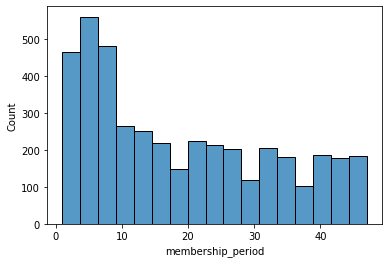

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.histplot(data=customer, x='membership_period')

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

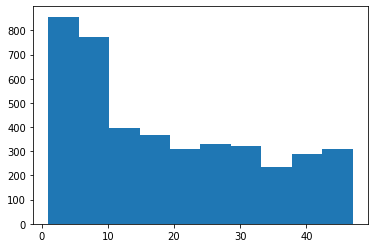

In [165]:
plt.hist(customer['membership_period'])

## 030 退会ユーザと継続ユーザの違い

In [168]:
customer_end = customer.loc[customer['is_deleted']==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [169]:
customer_stay = customer.loc[customer['is_deleted']==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000
